In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-sign-dataset-classification/labels.csv
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0060.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0073.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0045.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0020.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0012.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0061.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0074.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0034.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0053.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_1_0047.png
/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/7/007_0023.png
/kaggle/inpu

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import glob
import os

from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
data_train="/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA"
data_test="/kaggle/input/traffic-sign-dataset-classification/traffic_Data/TEST"

In [10]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(data_train,validation_split=0.2,
                                                    subset='training',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)
val_set = tf.keras.preprocessing.image_dataset_from_directory(data_train,validation_split=0.2,
                                                    subset='validation',
                                                    image_size=(224,224),
                                                    seed=123,
                                                    batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [5]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
   tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical")
  ]
)

In [11]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128 ,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(58 , activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [12]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam' , metrics=['accuracy'])

In [13]:

res = model.fit(train_set,validation_data=val_set, epochs=18 ,verbose=2 )

Epoch 1/18
105/105 - 351s - loss: 3.6118 - accuracy: 0.1025 - val_loss: 3.1711 - val_accuracy: 0.1859 - 351s/epoch - 3s/step
Epoch 2/18
105/105 - 346s - loss: 2.6936 - accuracy: 0.2614 - val_loss: 2.2119 - val_accuracy: 0.3609 - 346s/epoch - 3s/step
Epoch 3/18
105/105 - 347s - loss: 2.1611 - accuracy: 0.3390 - val_loss: 1.8611 - val_accuracy: 0.4388 - 347s/epoch - 3s/step
Epoch 4/18
105/105 - 347s - loss: 1.9872 - accuracy: 0.3639 - val_loss: 1.8215 - val_accuracy: 0.4376 - 347s/epoch - 3s/step
Epoch 5/18
105/105 - 343s - loss: 1.7112 - accuracy: 0.4568 - val_loss: 1.5764 - val_accuracy: 0.5180 - 343s/epoch - 3s/step
Epoch 6/18
105/105 - 343s - loss: 1.5959 - accuracy: 0.4760 - val_loss: 1.4296 - val_accuracy: 0.5432 - 343s/epoch - 3s/step
Epoch 7/18
105/105 - 344s - loss: 1.4915 - accuracy: 0.5018 - val_loss: 1.4406 - val_accuracy: 0.5264 - 344s/epoch - 3s/step
Epoch 8/18
105/105 - 345s - loss: 1.4579 - accuracy: 0.5150 - val_loss: 1.4662 - val_accuracy: 0.5420 - 345s/epoch - 3s/step


In [21]:
import os

# List files in the directory
files = os.listdir(data_test)

In [14]:
os.mkdir('model')
tf.keras.models.save_model(model, 'model')

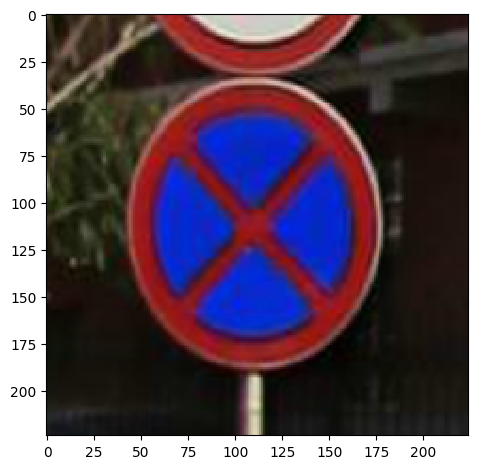

In [61]:

from tensorflow.keras.preprocessing import image


model = tf.keras.models.load_model('/kaggle/working/model')

labels_df = pd.read_csv('/kaggle/input/traffic-sign-dataset-classification/labels.csv')
class_labels = labels_df.set_index('ClassId')['Name'].to_dict()

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict top 5 classes for a given image
def predict_top_classes(image_path, model, class_labels, num_top_classes=5):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    top_classes_idx = np.argsort(predictions[0])[::-1][:num_top_classes]
    top_classes_probabilities = predictions[0][top_classes_idx]
    top_classes = [class_labels[class_id] for class_id in top_classes_idx]
    return top_classes, top_classes_probabilities



1/1 [==============================] - 0s 40ms/step


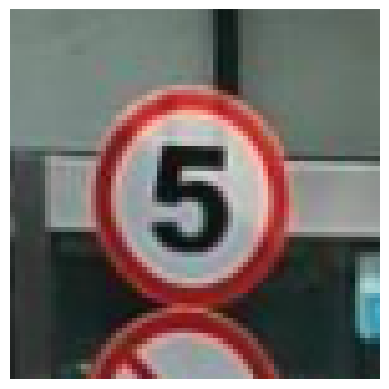

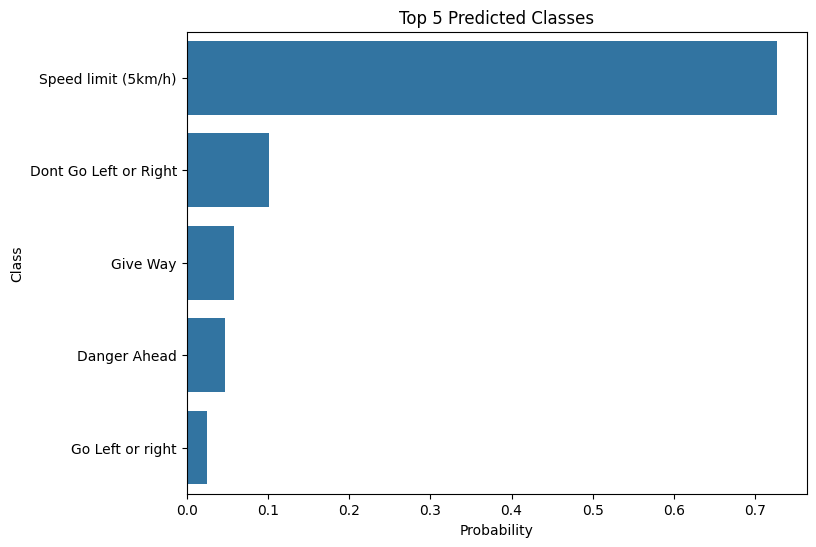

In [64]:
import matplotlib.image as mpimg

image_path = '/kaggle/input/traffic-sign-dataset-classification/traffic_Data/TEST/000_0007_j.png'

top_classes, top_classes_probabilities = predict_top_classes(image_path, model, class_labels)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=top_classes_probabilities, y=top_classes, color=sns.color_palette()[0])
plt.xlabel('Probability')
plt.ylabel('Class')
plt.title('Top 5 Predicted Classes')
plt.show()
